### <p style=color:red> Exercise 1: Use one-hot to quantize the value of attack_complexity in nvd vulnerability dataset.


In [39]:
import pandas as pd
df= pd.read_csv("E:/downld/nvd_cve_2022.csv")

#ensures that only attack complexity is obtained
df=df['attack_complexity']


# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns = ['attack_complexity'])

# Concatenate the encoded columns with the original DataFrame
df = pd.concat([df, df_encoded], axis=1)

# Display the encoded DataFrame
print(df)

      attack_complexity  HIGH  LOW
0                   LOW     0    1
1                   LOW     0    1
2                   LOW     0    1
3                   LOW     0    1
4                   LOW     0    1
...                 ...   ...  ...
22994               LOW     0    1
22995               LOW     0    1
22996               LOW     0    1
22997               LOW     0    1
22998               LOW     0    1

[22999 rows x 3 columns]


In [38]:
#quantizing the value of attack_complexity itself
df.value_counts()

LOW     21405
HIGH      948
Name: attack_complexity, dtype: int64

successfully quantitized the attack complexity through encoding it to eight high or low.
I have also used the value_count method if you want an overall summarized amount

### <p style=color:red> Exercise 2: Fill the missing base_score of NVD vulnerabilities with the mean value. After filling the missing values, check if there is missing values left.

In [1]:
import pandas as pd
df= pd.read_csv("E:/downld/nvd_cve_2022.csv")

#mean value of base_score
mean_value=df['base_score'].mean()

In [3]:
#finds and replaces the missing values
df['base_score'].fillna(mean_value, inplace=True)

In [4]:
#checks if there is any missing value left
df[df['base_score'].isnull()]

,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date


### <p style=color:red> Exercise 3: fillin the missing exploitability_score of NVD vulnerabilities with the mode value. After filling in the missing values, check if there is missing values left

In [20]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("E:/downld/nvd_cve_2022.csv")

# Calculate the mode value of 'exploitability_score'
mode_value = df['exploitability_score'].mode()[0]  # Extract the first mode value, 
#due to the possibility of the mode not existing

# Fill missing values with the mode value
df['exploitability_score'].fillna(mode_value, inplace=True)

# Check if there are still null values
df[df['exploitability_score'].isnull()]



,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date


### <p style=color:red> Excercise 4: filling in the missing attack_complexity of NVD vulnerabilities with the KNN value. Note you first need to quantize the attack_complexity. you can use the result of exercise 1.

In [5]:
import pandas as pd
from sklearn.impute import KNNImputer

# Read the CSV file
df = pd.read_csv("E:/downld/nvd_cve_2022.csv")

# Ensure 'attack_complexity' is obtained and make sure we are working with a copy
attack_complexity = df[['attack_complexity']].copy()

# Quantitizing the attack complexity values
attack_complexity_mapping = {'LOW': 0, 'HIGH': 1}

# Quantize the 'attack_complexity' column using .loc to avoid SettingWithCopyWarning
#this is due to how locate allows for properlly locating values
attack_complexity.loc[:, 'attack_complexity'] = attack_complexity['attack_complexity'].map(attack_complexity_mapping)

# Initialize the KNN imputer with 5 neighbors
knn_imputer = KNNImputer(n_neighbors=5)

# Apply the KNN imputer to the quantized data
attack_complexity_imputed = knn_imputer.fit_transform(attack_complexity)

# Create a new DataFrame to store the imputed values
df_imputed = df.copy()
df_imputed['attack_complexity'] = attack_complexity_imputed


# Display the DataFrame with imputed values
df_imputed


,Unnamed: 0,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date
0,0,CVE-2022-0001,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,0.0,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11T18:15Z,2022-08-19T12:28Z
1,1,CVE-2022-0002,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,0.0,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11T18:15Z,2022-08-19T12:28Z
2,2,CVE-2022-0004,['Hardware debug modes and processor INIT sett...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:core_i3-12100_firmware:*:*:*...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,0.0,HIGH,HIGH,HIGH,NONE,6.8,MEDIUM,0.9,5.9,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12T17:15Z,2022-06-10T20:52Z
3,3,CVE-2022-0005,['Sensitive information accessible by physical...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:celeron_g5205u_firmware:-:*:...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,0.0,LOW,NONE,NONE,NONE,2.4,LOW,0.9,1.4,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12T17:15Z,2022-06-01T17:04Z
4,4,CVE-2022-0011,['PAN-OS software provides options to exclude ...,['https://security.paloaltonetworks.com/CVE-20...,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,0.0,NONE,HIGH,NONE,LOW,6.5,MEDIUM,2.8,3.6,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-02-10T18:15Z,2022-02-17T13:41Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22994,22994,CVE-2022-4937,['The WCFM Frontend Manager plugin for WordPre...,['https://plugins.trac.wordpress.org/changeset...,['cpe:2.3:a:wclovers:frontend_manager_for_wooc...,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:H/I:H/A:H,0.0,HIGH,HIGH,HIGH,LOW,8.8,HIGH,2.8,5.9,"[{'operator': 'OR', 'children': [], 'cpe_match...",2023-04-05T18:15Z,2023-04-11T18:03Z
22995,22995,CVE-2022-4938,"[""The WCFM Frontend Manager plugin for WordPre...",['https://plugins.trac.wordpress.org/changeset...,['cpe:2.3:a:wclovers:frontend_manager_for_wooc...,CVSS:3.1/AV:N/AC:L/PR:N/UI:R/S:U/C:H/I:H/A:H,0.0,HIGH,HIGH,HIGH,NONE,8.8,HIGH,2.8,5.9,"[{'operator': 'OR', 'children': [], 'cpe_match...",2023-04-05T18:15Z,2023-04-11T18:24Z
22996,22996,CVE-2022-4939,['THe WCFM Membership plugin for WordPress is ...,['https://www.wordfence.com/threat-intel/vulne...,['cpe:2.3:a:wclovers:wcfm_membership:*:*:*:*:*...,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,0.0,HIGH,HIGH,HIGH,NONE,9.8,CRITICAL,3.9,5.9,"[{'operator': 'OR', 'children': [], 'cpe_match...",2023-04-05T19:15Z,2023-04-12T01:41Z
22997,22997,CVE-2022-4940,['The WCFM Membership plugin for WordPress is ...,['https://plugins.trac.wordpress.org/changeset...,['cpe:2.3:a:wclovers:wcfm_membership:*:*:*:*:*...,CVSS:3.1/AV:N/AC:L/PR:N/UI:N/S:U/C:L/I:L/A:N,0.0,LOW,LOW,NONE,NONE,6.5,MEDIUM,3.9,2.5,"[{'operator': 'OR', 'children': [], 'cpe_match...",2023-04-05T19:15Z,2023-04-12T01:55Z


#### <p style=color:red> Exercise 5: Outliers as Anomalies Outlier detection approaches can be used for anomaly detection in security applications.For example, by monitoring the frequency of user logins and applying the outlier a lgorithm, you can flag potential anomalies that could indicate suspicious or unauthorized activities. In the dataset test.jsonl: 1- Map the column “events” dictionary to a new columns 2- Change the format of the columns ‘ts’ to date 3- Find the number of sessions per day for every user 4- How many records are there in the dataset per user per day session 5- Find the outliers for large number of logins per day 6- How many outlier rows you have find

In [2]:
import pandas as pd
import json

# Load the dataset
session_df = pd.read_json('E:/NewDownloads/Y4S2/test.jsonl', lines=True)
session_df.head()

,session,events
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '..."
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':..."
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ..."
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':..."
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ..."


In [3]:
#mapping column events dictionary to a new column
session_df.iloc[0]['events']
new_df = pd.DataFrame(session_df['events'].apply(lambda x: x[0]).tolist())

session_df1 = pd.concat([session_df, new_df], axis=1)

In [4]:
session_df1.head()

,session,events,aid,ts,type
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '...",59625,1661724000278,clicks
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':...",1142000,1661724000378,clicks
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ...",141736,1661724000559,clicks
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':...",1669402,1661724000568,clicks
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ...",255297,1661724000572,clicks


In [5]:
#2- Change the format of the columns timestamps, also known as ts, to date
session_df1['timestamp'] = pd.to_datetime(session_df1['ts'], unit='ms')
session_df1['date'] = session_df1['timestamp'].dt.date

In [32]:
session_df1.head()

,session,events,aid,ts,type,timestamp,date
0,12899779,"[{'aid': 59625, 'ts': 1661724000278, 'type': '...",59625,1661724000278,clicks,2022-08-28 22:00:00.278,2022-08-28
1,12899780,"[{'aid': 1142000, 'ts': 1661724000378, 'type':...",1142000,1661724000378,clicks,2022-08-28 22:00:00.378,2022-08-28
2,12899781,"[{'aid': 141736, 'ts': 1661724000559, 'type': ...",141736,1661724000559,clicks,2022-08-28 22:00:00.559,2022-08-28
3,12899782,"[{'aid': 1669402, 'ts': 1661724000568, 'type':...",1669402,1661724000568,clicks,2022-08-28 22:00:00.568,2022-08-28
4,12899783,"[{'aid': 255297, 'ts': 1661724000572, 'type': ...",255297,1661724000572,clicks,2022-08-28 22:00:00.572,2022-08-28


In [33]:
#3- Find the number of sessions per day for every user
session_df1.groupby(['aid','date']).count()

session  events  ts  type  timestamp
aid     date                                            
0       2022-09-04        1       1   1     1          1
3       2022-08-29       22      22  22    22         22
        2022-08-30       17      17  17    17         17
        2022-08-31       10      10  10    10         10
        2022-09-01        2       2   2     2          2
...                     ...     ...  ..   ...        ...
1855593 2022-09-02        2       2   2     2          2
        2022-09-03        1       1   1     1          1
1855594 2022-08-30        1       1   1     1          1
        2022-08-31        2       2   2     2          2
        2022-09-04        1       1   1     1          1

[761523 rows x 5 columns]

In [34]:
#4- How many records are there in the dataset per user per day session 
print("There are ")
session_df1.groupby(['aid','date']).size()

There are 


aid      date      
0        2022-09-04     1
3        2022-08-29    22
         2022-08-30    17
         2022-08-31    10
         2022-09-01     2
                       ..
1855593  2022-09-02     2
         2022-09-03     1
1855594  2022-08-30     1
         2022-08-31     2
         2022-09-04     1
Length: 761523, dtype: int64

In [35]:
print("records in the dataset per user per day session")

records in the dataset per user per day session


In [6]:
# #5- Find the outliers for large number of logins per day using standard deviation
import numpy as np
import json

threshold=35 #the number 35 is chosen due to the large amount of data being below 35, making it the standard
mean = np.mean(session_df1.groupby(['aid','date']).size())
std = np.std(session_df1.groupby(['aid','date']).size())
cutoff = threshold * std
#the logins per day is based on the the ID and Date size

outliers = [x for x in session_df1.groupby(['aid','date']).size() if (x < mean - cutoff) or (x > mean + cutoff)]

print("Mean:", mean)
print("STD:",std)
print("Outliers:", outliers)

Mean: 2.195341440770666
STD: 7.327346284663665
Outliers: [383, 1268, 500, 388, 356, 411, 318, 262, 380, 401, 573, 266, 386, 440, 295, 1006, 2864, 335, 322, 273, 524, 281, 950, 279, 688, 910, 438, 742, 373, 397, 496, 452, 468, 508, 427, 420, 546, 326, 958, 273, 316, 504, 333, 416]


#### <p style=color:red> Exercise 6 Generate the same figure for exercise 5 and compare the two figures for outlier detection based on STD and LOF ! Which one is better at detecting anomalies and why?

In terms of a gernal sense LOF is better at detecting anomalies due to how it is designed to learn from a base model/data sense. Where STD requires a predefenition of what is an outlier. This means that in relation to hardware constraints however, LOF is more costlier due to how it relies on the CPU for predicting the model, but ther  CPU ends up hanging due to the lack of resources

## <p style=color:red> NOTE: due to hardware constraints I am unable to run the actual predicting algorithm, I am still able to type out the algorithm itself but unable to actually run the tests in relation to just the Exercise 6 where it requires LOF

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
# Fit the Local Outlier Factor model
lof_model = LocalOutlierFactor(contamination=0.01)  # Contamination refers to the expected proportion of outliers
outlier_scores = lof_model.fit_predict(session_df1.groupby(['aid','date']).count().values.reshape(-1, 1))

ValueError: x and y must have same first dimension, but have shapes (1671803,) and (761523,)

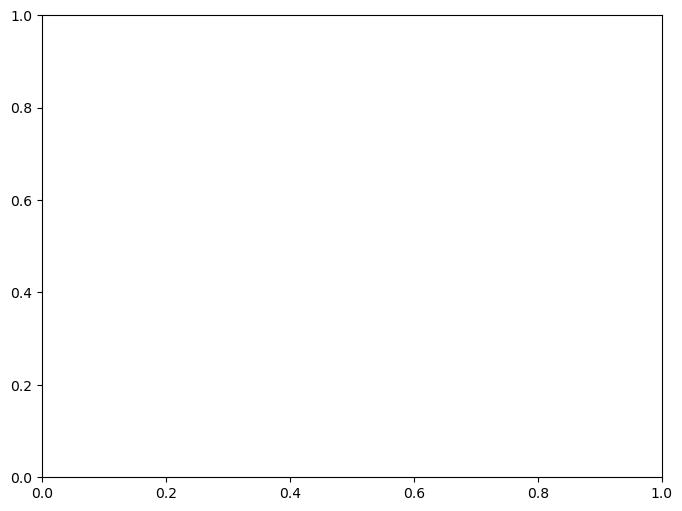

In [48]:
threshold = 1

# Create the chart
plt.figure(figsize=(8, 6))
plt.plot(session_df1.index, session_df1.groupby(['aid','date']).count(), 'bo-', label='Data')

# Plot the outliers identified by LOF
outliers = session_df1[outlier_scores == -1]
plt.plot(outliers.index, outliers.groupby(['aid','date']).count(), 'ro', label='Outliers')

plt.xlabel('Index')
plt.ylabel('# of Sessions')
plt.title('Outliers Based on Local Outlier Factor')
plt.legend()
plt.grid(True)

# Show the chart
plt.show()